In [ ]:
In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

NOTE:ThesolutionsharedthroughGithubshouldcontainthesource

In [113]:
import pandas
#with open("nba_2013.csv", 'r') as csvfile:
df = pandas.read_csv('nba_2013.csv')

In [114]:
df

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [7]:
df.nunique()

player          481
pos               7
age              21
bref_team_id     31
g                82
gs               80
mp              433
fg              296
fga             372
fg.             212
x3p             134
x3pa            221
x3p.            272
x2p             274
x2pa            339
x2p.            408
efg.            202
ft              203
fta             231
ft.             244
orb             155
drb             267
trb             302
ast             230
stl             120
blk              90
tov             180
pf              204
pts             379
season            1
season_end        1
dtype: int64

In [ ]:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored

In [116]:
df[['player','pos','g','gs','pts']]

,player,pos,g,gs,pts
0,Quincy Acy,SF,63,0,171
1,Steven Adams,C,81,20,265
2,Jeff Adrien,PF,53,12,362
3,Arron Afflalo,SG,73,73,1330
4,Alexis Ajinca,C,56,30,328
...,...,...,...,...,...
476,Tony Wroten,SG,72,16,939
477,Nick Young,SG,64,9,1144
478,Thaddeus Young,PF,79,78,1417
479,Cody Zeller,C,82,3,490


In [117]:
df['pos'].unique()

array(['SF', 'C', 'PF', 'SG', 'PG', 'G', 'F'], dtype=object)

In [10]:
import seaborn as sns

In [118]:
X=df[['pos','g','gs']]

In [119]:
y= df['pts']

In [120]:
X 

,pos,g,gs
0,SF,63,0
1,C,81,20
2,PF,53,12
3,SG,73,73
4,C,56,30
...,...,...,...
476,SG,72,16
477,SG,64,9
478,PF,79,78
479,C,82,3


In [121]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [122]:
le=LabelEncoder()

In [109]:
ct = ColumnTransformer([('Encoder',OneHotEncoder(sparse=False,drop='first'),[0])],remainder='passthrough')

In [123]:
X['pos']=le.fit_transform(X['pos'])

<ipython-input-123-0b8cda836ceb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['pos']=le.fit_transform(X['pos'])


In [125]:
X1=ct.fit_transform(X)

In [126]:
X1.shape

(481, 8)

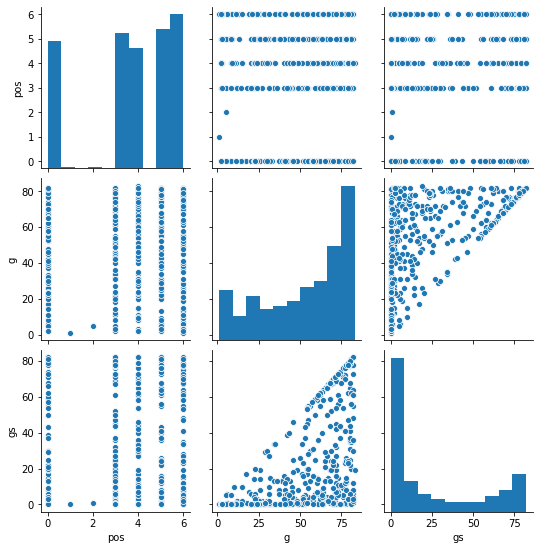

In [20]:
sns.pairplot(X)

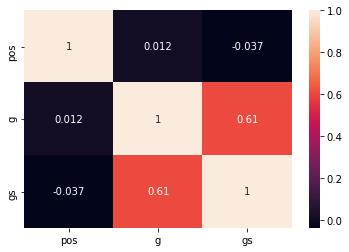

In [21]:
sns.heatmap(X.corr(),annot=True)

In [23]:
import matplotlib.pyplot as plt

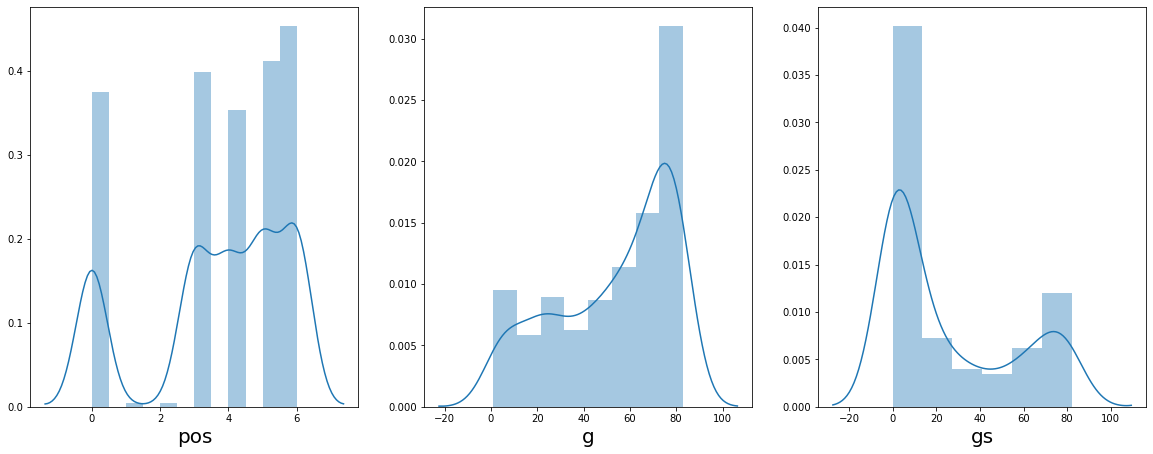

In [24]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
X.isna().sum()

pos    0
g      0
gs     0
dtype: int64

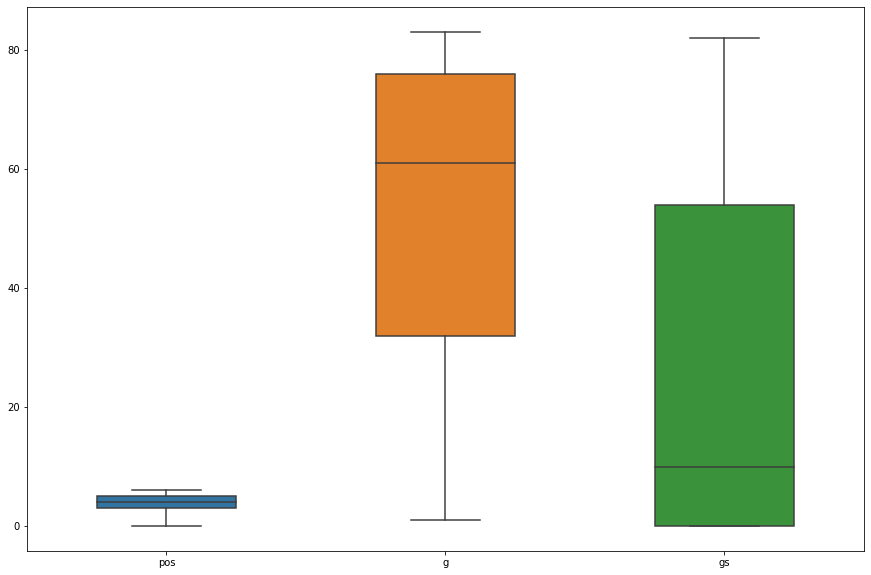

In [27]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=X, width= 0.5,ax=ax,  fliersize=3)

In [28]:
sc = StandardScaler()

In [39]:
X

,pos,g,gs
0,5,63,0
1,0,81,20
2,3,53,12
3,6,73,73
4,0,56,30
...,...,...,...
476,6,72,16
477,6,64,9
478,3,79,78
479,0,82,3


In [40]:
on = OneHotEncoder()

In [43]:
A=on.fit_transform([X['pos']])

In [48]:
import pandas as pd

In [50]:
pd.get_dummies(X['pos'], prefix='pos')

,pos_0,pos_1,pos_2,pos_3,pos_4,pos_5,pos_6
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
476,0,0,0,0,0,0,1
477,0,0,0,0,0,0,1
478,0,0,0,1,0,0,0
479,1,0,0,0,0,0,0


In [127]:
X1

array([[ 0.,  0.,  0., ...,  0., 63.,  0.],
       [ 0.,  0.,  0., ...,  0., 81., 20.],
       [ 0.,  0.,  1., ...,  0., 53., 12.],
       ...,
       [ 0.,  0.,  1., ...,  0., 79., 78.],
       [ 0.,  0.,  0., ...,  0., 82.,  3.],
       [ 0.,  0.,  0., ...,  0., 70.,  9.]])

In [129]:
X

,pos,g,gs
0,5,63,0
1,0,81,20
2,3,53,12
3,6,73,73
4,0,56,30
...,...,...,...
476,6,72,16
477,6,64,9
478,3,79,78
479,0,82,3


In [52]:
from sklearn.model_selection import train_test_split

In [130]:
#without scaling and without onehot encoding

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [63]:
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Train_score : ",knn.score(x_train, y_train) ,"::: Test_score : ",knn.score(x_test, y_test) ,":::","Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k)

Train_score :  0.9166981308738289 ::: Test_score :  0.6233583556303901 ::: Regression score is: 0.6234 for k_value: 1
Train_score :  0.8663426257805394 ::: Test_score :  0.6802092422894188 ::: Regression score is: 0.6802 for k_value: 2
Train_score :  0.8468208467694242 ::: Test_score :  0.7140037983569854 ::: Regression score is: 0.7140 for k_value: 3
Train_score :  0.818198609835969 ::: Test_score :  0.743037639749603 ::: Regression score is: 0.7430 for k_value: 4
Train_score :  0.8077883519177254 ::: Test_score :  0.7687874031854033 ::: Regression score is: 0.7688 for k_value: 5
Train_score :  0.7951783944043862 ::: Test_score :  0.7553246115936604 ::: Regression score is: 0.7553 for k_value: 6
Train_score :  0.7818467722450892 ::: Test_score :  0.7613217127379912 ::: Regression score is: 0.7613 for k_value: 7
Train_score :  0.7863823706035016 ::: Test_score :  0.7640251780824399 ::: Regression score is: 0.7640 for k_value: 8
Train_score :  0.7812747803552139 ::: Test_score :  0.7579

In [132]:
#with scaling and onehot encoding

In [131]:
X1_scaled=sc.fit_transform(X1)

In [133]:
x_train, x_test, y_train, y_test = train_test_split(X1_scaled, y, test_size=0.3, random_state=0)

In [134]:
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Train_score : ",knn.score(x_train, y_train) ,"::: Test_score : ",knn.score(x_test, y_test) ,":::","Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k)

Train_score :  0.8843668816557688 ::: Test_score :  0.6288522105578918 ::: Regression score is: 0.6289 for k_value: 1
Train_score :  0.8639408637977858 ::: Test_score :  0.6461748126343541 ::: Regression score is: 0.6462 for k_value: 2
Train_score :  0.8252255875362307 ::: Test_score :  0.7113691728806979 ::: Regression score is: 0.7114 for k_value: 3
Train_score :  0.814851089459438 ::: Test_score :  0.7087040021762754 ::: Regression score is: 0.7087 for k_value: 4
Train_score :  0.8069193886758048 ::: Test_score :  0.7153199929376786 ::: Regression score is: 0.7153 for k_value: 5
Train_score :  0.7973961523954612 ::: Test_score :  0.7208634581981058 ::: Regression score is: 0.7209 for k_value: 6
Train_score :  0.7798757056283339 ::: Test_score :  0.7414697566472717 ::: Regression score is: 0.7415 for k_value: 7
Train_score :  0.7826622806765606 ::: Test_score :  0.75343621120579 ::: Regression score is: 0.7534 for k_value: 8
Train_score :  0.7682560397149183 ::: Test_score :  0.75733

In [149]:
X1[10]

array([ 0.,  0.,  0.,  0.,  1.,  0., 80., 65.])

In [150]:
knn.predict(sc.transform([[ 0.,  0.,  0.,  0.,  1.,  0., 80., 65.]]))

array([973.])

In [151]:
y[10]

572

In [161]:
df.dropna(inplace=True)

In [162]:
df.isna().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [163]:
df.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,...,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.000000,403.0
mean,26.488834,57.660050,28.727047,1383.034739,217.535980,482.496278,0.432630,47.208437,131.208437,0.284293,...,57.538462,176.260546,233.799007,131.161290,44.736973,24.622829,80.898263,114.925558,585.915633,2013.0
std,4.281947,22.683877,30.412503,873.264134,172.724338,368.948872,0.073309,52.259030,135.247576,0.152235,...,61.895678,143.296787,197.515808,135.108216,34.806934,30.644189,63.316249,68.811621,474.422805,0.0
min,19.000000,2.000000,0.000000,7.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,41.000000,1.000000,587.500000,69.500000,162.000000,0.401000,3.000000,14.500000,0.236695,...,15.500000,65.000000,86.000000,33.000000,16.000000,5.000000,28.500000,57.500000,182.000000,2013.0
50%,26.000000,65.000000,13.000000,1396.000000,183.000000,410.000000,0.435000,28.000000,88.000000,0.330827,...,36.000000,150.000000,194.000000,82.000000,40.000000,14.000000,66.000000,121.000000,490.000000,2013.0
75%,29.000000,77.000000,61.000000,2157.500000,336.000000,721.500000,0.470000,74.000000,212.000000,0.375000,...,73.500000,242.000000,323.500000,192.500000,65.000000,32.000000,120.500000,165.000000,909.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,0.659000,261.000000,615.000000,1.000000,...,440.000000,739.000000,1071.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        403 non-null    object 
 1   pos           403 non-null    object 
 2   age           403 non-null    int64  
 3   bref_team_id  403 non-null    object 
 4   g             403 non-null    int64  
 5   gs            403 non-null    int64  
 6   mp            403 non-null    int64  
 7   fg            403 non-null    int64  
 8   fga           403 non-null    int64  
 9   fg.           403 non-null    float64
 10  x3p           403 non-null    int64  
 11  x3pa          403 non-null    int64  
 12  x3p.          403 non-null    float64
 13  x2p           403 non-null    int64  
 14  x2pa          403 non-null    int64  
 15  x2p.          403 non-null    float64
 16  efg.          403 non-null    float64
 17  ft            403 non-null    int64  
 18  fta           403 non-null    

In [165]:
df_all = df.loc[:,(df.dtypes=='int64') | (df.dtypes=='float64')]

In [166]:
df_all

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,166,599,765,178,63,68,123,147,1603,2013
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,119,192,311,71,24,33,44,126,303,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,...,69,159,228,217,78,16,204,151,939,2013
477,28,64,9,1810,387,889,0.435,135,350,0.385714,...,29,137,166,95,46,12,95,156,1144,2013
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,...,166,310,476,182,167,36,165,213,1417,2013
479,21,82,3,1416,172,404,0.426,0,1,0.000000,...,118,235,353,92,40,41,87,170,490,2013


In [167]:
df_all=df.select_dtypes(exclude='object')

In [168]:
df_alll = df_all.iloc[:,:-1]

In [169]:
df_alll

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0.660,72,144,216,28,23,26,30,122,171
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,0.815,32,230,262,248,35,3,146,136,1330
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0.836,94,183,277,40,23,46,63,187,328
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,0.822,166,599,765,178,63,68,123,147,1603
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,0.660,119,192,311,71,24,33,44,126,303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,...,0.641,69,159,228,217,78,16,204,151,939
477,28,64,9,1810,387,889,0.435,135,350,0.385714,...,0.825,29,137,166,95,46,12,95,156,1144
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,...,0.712,166,310,476,182,167,36,165,213,1417
479,21,82,3,1416,172,404,0.426,0,1,0.000000,...,0.730,118,235,353,92,40,41,87,170,490


In [170]:
X=df_alll.drop('pts',axis=1)
y=df_alll['pts']

In [171]:
X_scaled=sc.fit_transform(X)

In [172]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

In [173]:
for k in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Train_score : ",knn.score(x_train, y_train) ,"::: Test_score : ",knn.score(x_test, y_test) ,":::","Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k)

Train_score :  1.0 ::: Test_score :  0.9395580012794923 ::: Regression score is: 0.9396 for k_value: 1
Train_score :  0.9817730621142209 ::: Test_score :  0.963968179711699 ::: Regression score is: 0.9640 for k_value: 2
Train_score :  0.9776036402310607 ::: Test_score :  0.9645001600618743 ::: Regression score is: 0.9645 for k_value: 3
Train_score :  0.9736637700042675 ::: Test_score :  0.9598744885700172 ::: Regression score is: 0.9599 for k_value: 4
Train_score :  0.9723725080462583 ::: Test_score :  0.9546499198146725 ::: Regression score is: 0.9546 for k_value: 5
Train_score :  0.9704452823917368 ::: Test_score :  0.9571214987717271 ::: Regression score is: 0.9571 for k_value: 6
Train_score :  0.965738259892916 ::: Test_score :  0.9558261409683156 ::: Regression score is: 0.9558 for k_value: 7
Train_score :  0.9664374937565117 ::: Test_score :  0.9566334417620472 ::: Regression score is: 0.9566 for k_value: 8
Train_score :  0.9643872483319524 ::: Test_score :  0.9555539773070213 ::

In [180]:
list(X.loc[0, :])

[23.0,
 63.0,
 0.0,
 847.0,
 66.0,
 141.0,
 0.46799999999999997,
 4.0,
 15.0,
 0.266666666666667,
 62.0,
 126.0,
 0.49206349206349204,
 0.48200000000000004,
 35.0,
 53.0,
 0.66,
 72.0,
 144.0,
 216.0,
 28.0,
 23.0,
 26.0,
 30.0,
 122.0]

In [184]:
knn.predict(sc.transform([list(X.loc[3, :])]))

array([1211.])

In [185]:
y

0       171
3      1330
4       328
6      1603
7       303
       ... 
476     939
477    1144
478    1417
479     490
480     399
Name: pts, Length: 403, dtype: int64

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,53,0.660,72,144,216,28,23,26,30,122
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,336,0.815,32,230,262,248,35,3,146,136
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,67,0.836,94,183,277,40,23,46,63,187
6,28,69,69,2498,652,1423,0.458,3,15,0.200000,...,360,0.822,166,599,765,178,63,68,123,147
7,24,65,2,1072,134,300,0.447,2,13,0.153846,...,50,0.660,119,192,311,71,24,33,44,126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,20,72,16,1765,345,808,0.427,40,188,0.212766,...,326,0.641,69,159,228,217,78,16,204,151
477,28,64,9,1810,387,889,0.435,135,350,0.385714,...,285,0.825,29,137,166,95,46,12,95,156
478,25,79,78,2718,582,1283,0.454,90,292,0.308219,...,229,0.712,166,310,476,182,167,36,165,213
479,21,82,3,1416,172,404,0.426,0,1,0.000000,...,200,0.730,118,235,353,92,40,41,87,170
